In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 19 16:46:20 2024

@author: sspringe137, AndreScaffidi
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Directory setup for custom modules
import sys
module_path = '../../eagleeye'
sys.path.append(module_path)
import EagleEye_v7
import sys


# Custom plotting settings
sns.set(style="darkgrid")
plt.rcParams.update({
    'axes.titlesize': 21,
    'axes.labelsize': 17,
    'xtick.labelsize': 17,
    'ytick.labelsize': 17,
    'legend.fontsize': 17,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'grid.color': 'gray'
})

def generate_positions_with_separation(dim, num_anomalies, separation_factor=20):
    positions = []
    center_positions = []
    border_positions = []
    
    for i in range(num_anomalies):
        position = np.zeros(dim)
        
        if i < dim:  # Place the first `dim` anomalies near the center
            position[:dim] = (i - (dim / 2)) * separation_factor
            center_positions.append(position)
        else:  # Place remaining anomalies near the borders
            axis = (i % dim)  # Alternate through dimensions for placement
            direction = (-1 if (i // dim) % 2 == 0 else 1)  # Alternate directions
            position[axis] = direction * (50 + ((i // dim) * separation_factor))
            border_positions.append(position)
        
        positions.append(position)

    return np.array(positions)


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Generate data with anomalies
num_points = 100000
anomaly_sizes = [50, 100, 200, 300, 500, 700, 900]
n_dim = 3


# Generate the points
reference_data = np.random.uniform(low=-100, high=100, size=(num_points, n_dim))

# Generate the points
data_with_anomaly = np.random.uniform(low=-100, high=100, size=(num_points-sum(anomaly_sizes), n_dim))

# Generate separated positions dynamically
positions = generate_positions_with_separation(n_dim, len(anomaly_sizes))

# Generate anomalies with the new positions
overdensities = []
local_i = 1
for size, center in zip(anomaly_sizes, positions):
    
    anomaly = np.random.normal(loc=center, scale=local_i, size=(size, n_dim))
    overdensities.append(anomaly)
    local_i = local_i + 1

# Combine the test set with the anomalies
data_with_anomaly = np.vstack([data_with_anomaly] + overdensities)


Soar!
Compute overdensities
Processing partition 1/1000
Processing partition 2/1000
Processing partition 3/1000
Processing partition 4/1000
Processing partition 6/1000
Processing partition 5/1000
Processing partition 7/1000
Processing partition 8/1000
Processing partition 9/1000
Processing partition 10/1000
Processing partition 11/1000
Processing partition 13/1000
Processing partition 12/1000
Processing partition 14/1000
Processing partition 15/1000
Processing partition 16/1000
Processing partition 17/1000
Processing partition 18/1000
Processing partition 20/1000
Processing partition 19/1000
Processing partition 21/1000
Processing partition 23/1000
Processing partition 22/1000
Processing partition 24/1000
Processing partition 25/1000
Processing partition 30/1000
Processing partition 27/1000
Processing partition 32/1000
Processing partition 31/1000
Processing partition 44/1000
Processing partition 45/1000
Processing partition 33/1000
Processing partition 26/1000
Processing partition 46/

In [ ]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# EagleEye
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
res = EagleEye_v7.Soar(reference_data, data_with_anomaly, result_dict={}, K_M=100, critical_quantile=1-1e-5, post_process=True, num_cores=100, validation=None, partition_size=100,smoothing=3)

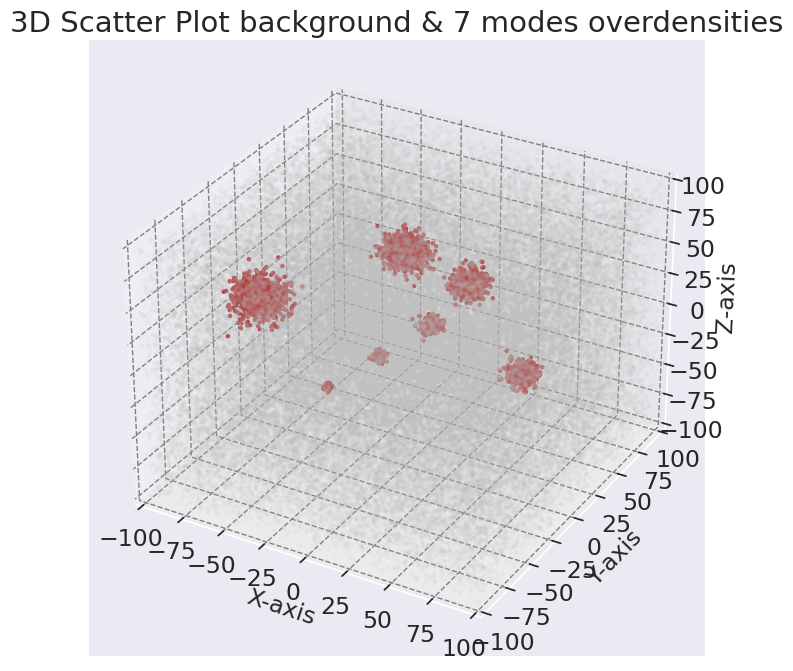

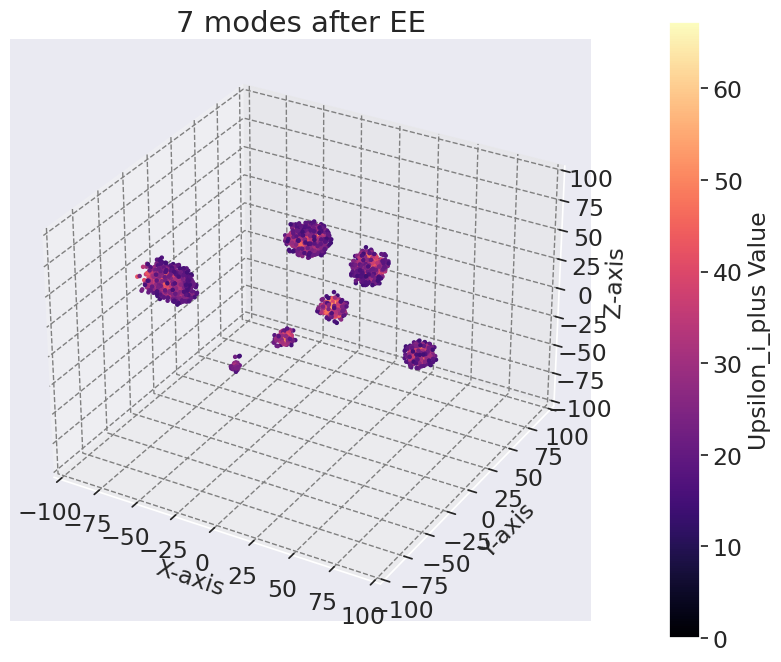

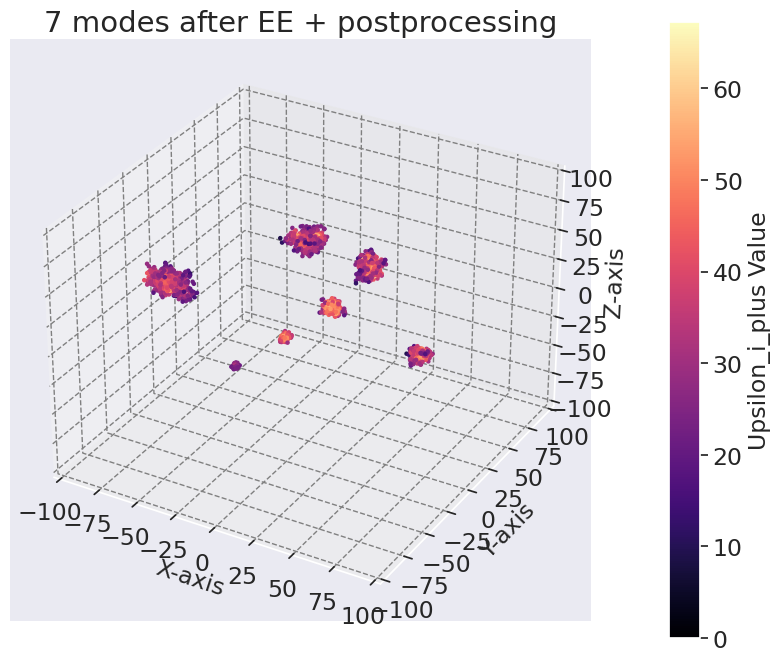

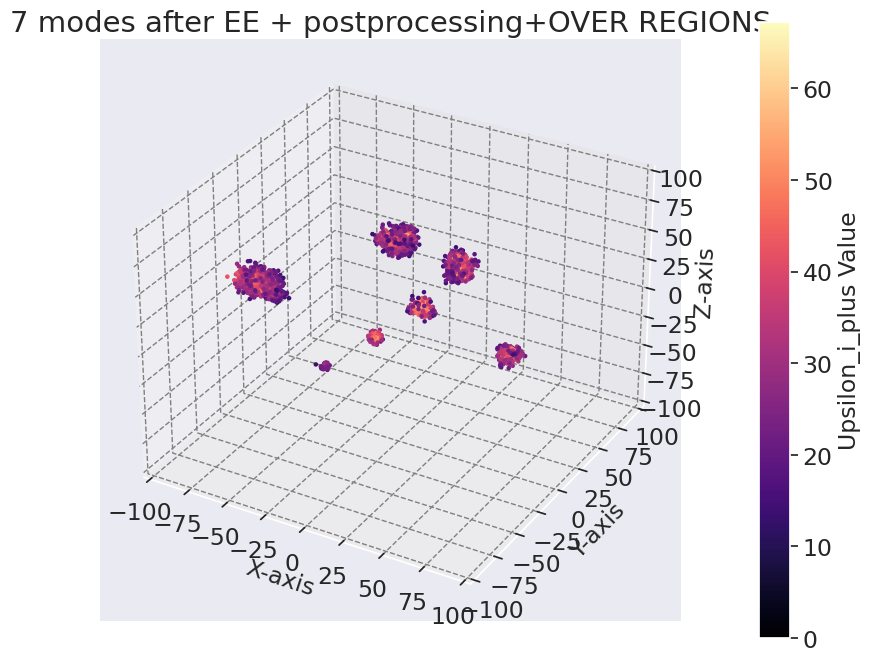

In [2]:
# Display the results
critical_quantile         = res['critical_quantile']  
stats                     = res['stats'] # Dict containing all upsilon+ and upsilon- values
stats_reverse             = res['stats_reverse']
Upsilon_star_plus         = res['Upsilon_star_minus']
Upsilon_star_minus        = res['Upsilon_star_plus']
Upsilon_i_plus_null       = res['Upsilon_i_minus_null']
Upsilon_i_minus_null      = res['Upsilon_i_plus_null']
REGION_UNDER              = res['REGION_UNDER']
REGION_OVER               = res['REGION_OVER']           
unique_elements_overdensities = res['unique_elements_overdensities']
unique_elements_underdensities= res['unique_elements_underdensities']


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reference_data[:, 0], reference_data[:, 1], reference_data[:, 2], s=5, alpha=0.05, c='silver')
ax.scatter(data_with_anomaly[-sum(anomaly_sizes):, 0], data_with_anomaly[-sum(anomaly_sizes):, 1], data_with_anomaly[-sum(anomaly_sizes):, 2], s=5, alpha=1, c='firebrick')

ax.set_xlim([-100,100])
ax.set_ylim([-100,100])
ax.set_zlim([-100,100])

# Set plot labels and title
ax.set_title("3D Scatter Plot background & 7 modes overdensities")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")


#%% 3D scatter of 7 modes after EE

i_EE = stats['Upsilon_i_plus'] > Upsilon_star_plus

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot and capture the scatter object
scatter = ax.scatter(
    data_with_anomaly[i_EE, 0],
    data_with_anomaly[i_EE, 1],
    data_with_anomaly[i_EE, 2],
    c=stats['Upsilon_i_plus'][i_EE],
    cmap='magma',
    alpha=1,
    s=5,
    vmin=0
)

# Set the limits for each axis
ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])
ax.set_zlim([-100, 100])

# Set plot labels and title
ax.set_title("7 modes after EE")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# Add the colorbar using the scatter object
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Upsilon_i_plus Value')  # Optional: Add a label to the colorbar

plt.show()

#%% 3D scatter of 7 modes after EE + iterative equalization


i_EE_postprocessing = unique_elements_overdensities

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot and capture the scatter object
scatter = ax.scatter(
    data_with_anomaly[i_EE_postprocessing, 0],
    data_with_anomaly[i_EE_postprocessing, 1],
    data_with_anomaly[i_EE_postprocessing, 2],
    c=stats['Upsilon_i_plus'][i_EE_postprocessing],
    cmap='magma',
    alpha=1,
    s=5,
    vmin=0
)

# Set the limits for each axis
ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])
ax.set_zlim([-100, 100])

# Set plot labels and title
ax.set_title("7 modes after EE + postprocessing")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# Add the colorbar using the scatter object
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Upsilon_i_plus Value')  # Optional: Add a label to the colorbar

plt.show()


#%% 3D scatter of 7 modes after EE + iterative equalization and smoothing 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot and capture the scatter object
scatter = ax.scatter(
    data_with_anomaly[REGION_OVER, 0],
    data_with_anomaly[REGION_OVER, 1],
    data_with_anomaly[REGION_OVER, 2],
    c=stats['Upsilon_i_plus'][REGION_OVER],
    cmap='magma',
    alpha=1,
    s=5,
    vmin=0
)

# Set the limits for each axis
ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])
ax.set_zlim([-100, 100])

# Set plot labels and title
ax.set_title("7 modes after EE + postprocessing+OVER REGIONS")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# Add the colorbar using the scatter object
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Upsilon_i_plus Value')  # Optional: Add a label to the colorbar

plt.show()